In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/employee_burnout.csv')

In [4]:
data.head(5)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,9/30/2008,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,11/30/2008,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,3/10/2008,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,11/3/2008,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,7/24/2008,Female,Service,No,3,7.0,6.9,0.52


In [5]:
data.tail(3)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22747,fffe390032003000,11/5/2008,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,1/10/2008,Female,Service,No,2,5.0,5.9,0.52
22749,fffe3400350031003800,1/6/2008,Male,Product,No,3,6.0,7.8,0.61


In [6]:
data.shape

(22750, 9)

In [7]:
data.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [8]:
data.replace('', np.nan, inplace=True)

In [9]:
data = data.dropna()

In [10]:
data.isna().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Date of Joining'] = pd.to_datetime(data['Date of Joining'])
data['Gender']=encoder.fit_transform(data['Gender'])
data['Company Type']=encoder.fit_transform(data['Company Type'])
data['WFH Setup Available']=encoder.fit_transform(data['WFH Setup Available'])

In [12]:
data.head(10)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,0,1,0,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,1,1,1,1,2.0,5.0,0.36
3,fffe32003400380032003900,2008-11-03,1,1,1,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,0,1,0,3,7.0,6.9,0.52
5,fffe3300350037003500,2008-11-26,1,0,1,2,4.0,3.6,0.29
6,fffe33003300340039003100,2008-01-02,0,1,0,3,6.0,7.9,0.62
7,fffe32003600320037003400,2008-10-31,0,1,1,2,4.0,4.4,0.33
10,fffe33003100330032003700,2008-03-16,1,0,1,2,3.0,5.3,0.50
11,fffe3400310035003800,2008-05-12,1,1,1,0,1.0,1.8,0.12
14,fffe33003100330036003300,2008-05-14,1,0,1,1,3.0,5.8,0.51


In [13]:
data[['Designation', 'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']].corr()


,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Designation,1.000000,0.877893,0.691823,0.736412
Resource Allocation,0.877893,1.000000,0.799563,0.855005
Mental Fatigue Score,0.691823,0.799563,1.000000,0.944389
Burn Rate,0.736412,0.855005,0.944389,1.000000


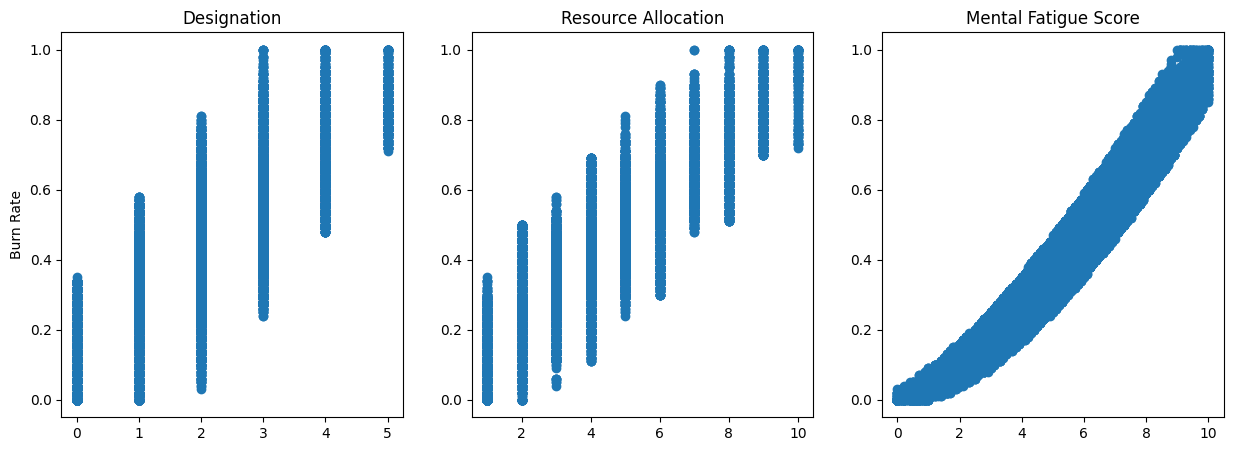

In [16]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(data['Designation'],data['Burn Rate'])
axs[0].set_title('Designation')
axs[0].set(ylabel='Burn Rate')
axs[1].scatter(data['Resource Allocation'],data['Burn Rate'])
axs[1].set_title('Resource Allocation')
axs[2].scatter(data['Mental Fatigue Score'],data['Burn Rate'])
axs[2].set_title('Mental Fatigue Score')
plt.show()

In [17]:
data['Month of Joining'] = data['Date of Joining'].dt.month

data['Quarter of Joining'] = data['Date of Joining'].dt.quarter

from datetime import date, datetime

seasons = {'Summer':(datetime(2008,6,21), datetime(2008,9,22)),
           'Autumn':(datetime(2008,9,23), datetime(2008,12,20)),
           'Spring':(datetime(2008,3,21), datetime(2008,6,20))}

def get_season(row):
    date = row['Date of Joining']
    for season,(season_start, season_end) in seasons.items():
        if date>=season_start and date<= season_end:
            return season
    else:
        return 'Winter'

data['Season of Joining'] = data.apply(lambda row: get_season(row), axis=1)


In [32]:
quater_dummies_data = pd.get_dummies(data['Quarter of Joining'], prefix='Quarter', drop_first=False)
season_dummies_data = pd.get_dummies(data['Season of Joining'], prefix='Season', drop_first=False)
designation_dummies_data = pd.get_dummies(data['Designation'], prefix='Designation', drop_first=False)

data = pd.concat([data, designation_dummies_data, quater_dummies_data, season_dummies_data], axis=1)


In [33]:
data.dtypes

Employee ID                     object
Date of Joining         datetime64[ns]
Gender                           int64
Company Type                     int64
WFH Setup Available              int64
Designation                      int64
Resource Allocation            float64
Mental Fatigue Score           float64
Burn Rate                      float64
Month of Joining                 int32
Quarter of Joining               int32
Season of Joining               object
Designation_0                     bool
Designation_1                     bool
Designation_2                     bool
Designation_3                     bool
Designation_4                     bool
Designation_5                     bool
Quarter_1                         bool
Quarter_2                         bool
Quarter_3                         bool
Quarter_4                         bool
Season_Autumn                     bool
Season_Spring                     bool
Season_Summer                     bool
Season_Winter            

In [34]:
X = data.drop(['Burn Rate','Date of Joining','Quarter of Joining','Season of Joining'], axis=1)
y = data['Burn Rate']

In [35]:
X.columns


Index(['Employee ID', 'Gender', 'Company Type', 'WFH Setup Available',
       'Designation', 'Resource Allocation', 'Mental Fatigue Score',
       'Month of Joining', 'Designation_0', 'Designation_1', 'Designation_2',
       'Designation_3', 'Designation_4', 'Designation_5', 'Quarter_1',
       'Quarter_2', 'Quarter_3', 'Quarter_4', 'Season_Autumn', 'Season_Spring',
       'Season_Summer', 'Season_Winter'],
      dtype='object')

In [38]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(interaction_only=True)

X_t = pd.DataFrame(poly.fit_transform(X[['Gender', 'Company Type', 'WFH Setup Available', 'Designation',
       'Resource Allocation', 'Mental Fatigue Score', 'Month of Joining']]))


X_t.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.0,0.0,1.0,0.0,2.0,3.0,3.8,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,7.6,18.0,11.4,27.0,34.2
1,1.0,1.0,1.0,1.0,1.0,2.0,5.0,11.0,1.0,1.0,...,1.0,2.0,5.0,11.0,2.0,5.0,11.0,10.0,22.0,55.0
2,1.0,1.0,1.0,1.0,1.0,1.0,2.6,11.0,1.0,1.0,...,1.0,1.0,2.6,11.0,1.0,2.6,11.0,2.6,11.0,28.6
3,1.0,0.0,1.0,0.0,3.0,7.0,6.9,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,21.0,20.7,21.0,48.3,49.0,48.3
4,1.0,1.0,0.0,1.0,2.0,4.0,3.6,11.0,0.0,1.0,...,2.0,4.0,3.6,11.0,8.0,7.2,22.0,14.4,44.0,39.6


In [43]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size=0.25, random_state=42)

# Get the actual feature names generated by PolynomialFeatures
features = X_t.columns

# Select all features for the model
X_train_lrm = X_train[features]
X_test_lrm = X_test[features]

lrm = linear_model.LinearRegression()
lrm.fit(X_train_lrm, y_train)

y_predict_lrm = lrm.predict(X_test_lrm)
print(y_predict_lrm)
print(y_predict_lrm.shape)

print('Coefficients:')
for item in zip(list(X_train_lrm.columns), lrm.coef_):
    print(item)

print('\nTrain R-squared: ', lrm.score(X_train_lrm, y_train))
print('Test R-squared: ', lrm.score(X_test_lrm, y_test))

[0.25716655 0.39214636 0.3462153  ... 0.50623178 0.40756342 0.54367339]
(4648,)
Coefficients:
(0, -6.36963108622912e-19)
(1, 0.0029449826302626624)
(2, 0.002831763854749178)
(3, -0.006376203171247168)
(4, 0.0021512547430818014)
(5, 0.0074254825334244285)
(6, 0.06687775852306549)
(7, 0.00047699279124219685)
(8, 0.0051924060289524985)
(9, 0.0022089675303887503)
(10, -0.0038966711683604905)
(11, 0.0012137741474725692)
(12, 0.00017920267878655566)
(13, -0.00027290586847506773)
(14, 0.0007279956908423271)
(15, -0.0009251617325172637)
(16, -0.0002390933823924644)
(17, -0.0001733915338195122)
(18, -0.00012502012250988445)
(19, -0.0005756295590145833)
(20, -9.690381699573394e-05)
(21, -0.0008333011378545365)
(22, 0.0003017219343981622)
(23, 4.8567347228347865e-06)
(24, -0.0002690139832599497)
(25, -0.00013294324258504965)
(26, 0.0028410393715672714)
(27, 0.0001720754280702323)
(28, -0.0001912047145457012)

Train R-squared:  0.9243882487709597
Test R-squared:  0.9243734681460157
